In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.12.0


In [ ]:
model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(24,24,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
# softmax classifier
model.add(Dense(3))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        1520      
                                                                 
 activation (Activation)     (None, 24, 24, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 500)               1440500   
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                        

In [ ]:
# create CNN Model
class LeNet:

    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


In [ ]:
DATASET = "train"  # this folde must contain three subfolder with images
MODEL = "boot.model" # name to store the model on disk
PLOT = "plot.png" # plot name

In [ ]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/DL Project/CNN Exam Shamik Shetty PGA14/CNN/Shoe Classification")

In [ ]:
!dir

test  train


In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Slippers":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label == "Boots":
            label = 2

        labels.append(label)
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/778 [00:00<?, ?it/s]

In [ ]:
data[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 13.,  20.,  29.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [186., 178., 180.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [ 20.,  23.,  24.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [122., 127., 129.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [253., 2

In [ ]:
data[0].shape

(28, 28, 3)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
labels

array([1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0,

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
trainX.shape

(583, 28, 28, 3)

In [ ]:
trainY.shape

(583,)

In [ ]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [ ]:
trainY[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
#Data Preprocessing (Augumentation)

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

In [ ]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)


opt = Adam(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

[INFO] compiling model...
[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 activation_3 (Activation)   (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                  

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=200, 
              verbose=1)

[INFO] training network...
Epoch 1/200
18/18 [==============================] - 2s 125ms/step - loss: 0.2175 - accuracy: 0.9129 - val_loss: 0.1752 - val_accuracy: 0.9179
Epoch 2/200
18/18 [==============================] - 3s 140ms/step - loss: 0.1982 - accuracy: 0.9238 - val_loss: 0.2044 - val_accuracy: 0.9231
Epoch 3/200
18/18 [==============================] - 2s 102ms/step - loss: 0.2738 - accuracy: 0.8947 - val_loss: 0.1908 - val_accuracy: 0.9077
Epoch 4/200
18/18 [==============================] - 2s 95ms/step - loss: 0.2296 - accuracy: 0.9093 - val_loss: 0.1750 - val_accuracy: 0.9231
Epoch 5/200
18/18 [==============================] - 2s 96ms/step - loss: 0.1886 - accuracy: 0.9365 - val_loss: 0.1499 - val_accuracy: 0.9179
Epoch 6/200
18/18 [==============================] - 2s 93ms/step - loss: 0.1922 - accuracy: 0.9256 - val_loss: 0.2622 - val_accuracy: 0.8974
Epoch 7/200
18/18 [==============================] - 2s 115ms/step - loss: 0.1917 - accuracy: 0.9274 - val_loss: 0.198

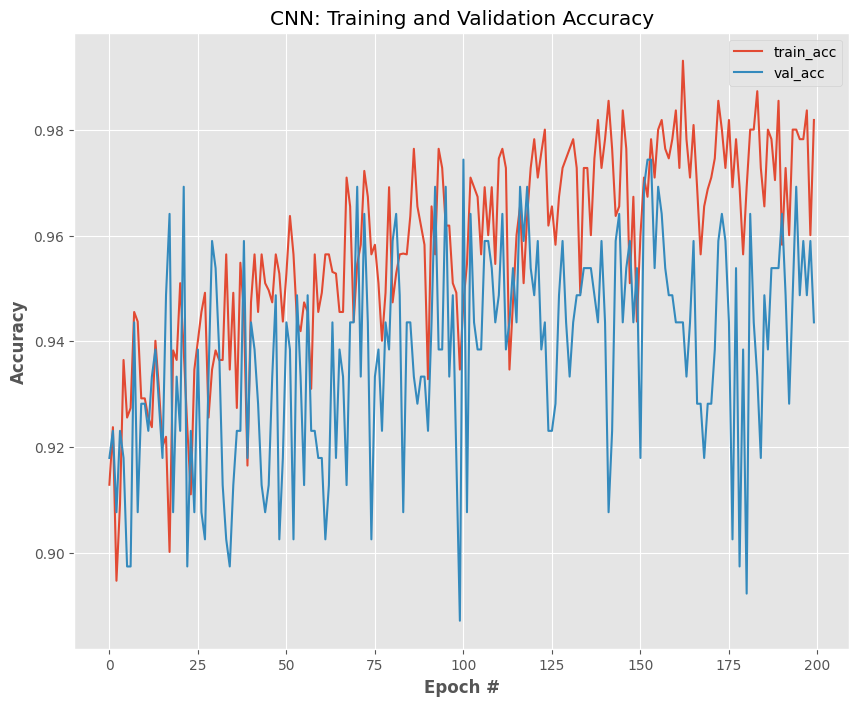

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

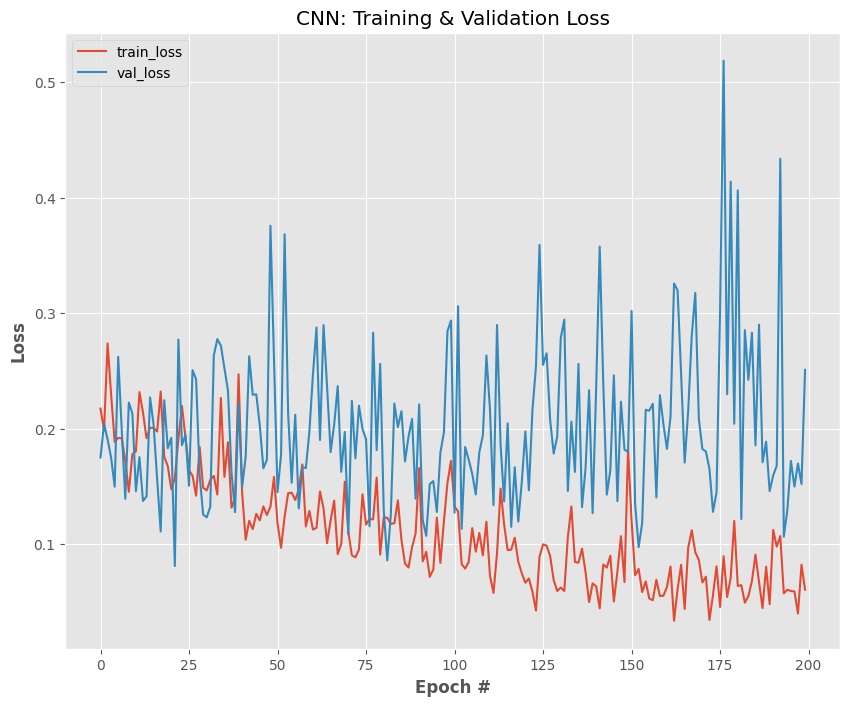

In [ ]:
# plot the training and validation loss
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    #plt.grid(b=None)
    ax = fig.add_subplot(111)

    ax.imshow(img)


In [ ]:
!dir


flagged  test  train


In [ ]:
from tqdm import tqdm

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Slippers", "Sandals", "Boots"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install gradio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Slippers"] = round(float(list(preds)[0]), 3)
    result["Sandals"] = round(float(list(preds)[1]), 3)
    result["Boots"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result

In [ ]:
im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://34f20d902e2cd17ccf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
